In [183]:
# 패키지 참조하기
import pymysql
from sqlalchemy import create_engine
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot
import datetime as dt
from pandas import read_excel
from pandas import read_csv
from pandas import concat
from pandas import merge
import numpy as np
from pandas import Series

# 모델을 구성하기위한 객체
from tensorflow.keras.models import Sequential
# 모델에 학습층을 쌓기 위한 클래스
from tensorflow.keras.layers import Dense
# 데이터를 훈련용과 테스트용으로 나누는 기능
from sklearn.model_selection import train_test_split

# 학습에 대한 콜백함수 처리용 패키지 참조
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

# 표준화 처리 패키지
from sklearn.preprocessing import StandardScaler

# 회귀분석을 수행하는 통계 패키지 (머신러닝과는 연관 없음)
from statsmodels.formula.api import ols

# 보스턴 집값 데이터를 로드하기 위한 객체 참조
from sklearn import datasets

from sklearn.decomposition import PCA # 주성분 분석용 패키지
from pca import pca # 주성분 분석 결과 시각화를 위한 패키지 
from matplotlib import pyplot as plt
import seaborn as sns

import openpyxl

In [259]:
df = read_excel('전처리_ver4.xlsx', engine='openpyxl')

In [260]:
df = DataFrame(df)
df

index    건축년도  전체세대수  135㎡세대수  전철역의수  지하철역과의거리(분)   주차대수  CCTV대수  \
0          1  2004.0    212      128      1         10.0  502.0    58.0   
1          2  2004.0    212      128      1         10.0  502.0    58.0   
2          3  2004.0    212      128      1         10.0  502.0    58.0   
3          4  2004.0    212      128      1         10.0  502.0    58.0   
4          5  2004.0    212      128      1         10.0  502.0    58.0   
...      ...     ...    ...      ...    ...          ...    ...     ...   
20435  20436  1998.0    544        0      3          NaN  499.0   160.0   
20436  20437  1998.0    544        0      3          NaN  499.0   160.0   
20437  20438  1998.0    544        0      3          NaN  499.0   160.0   
20438  20439  1998.0    544        0      3          NaN  499.0   160.0   
20439  20440  1998.0    544        0      3          NaN  499.0   160.0   

             연면적     주거전용면적  편의시설수  부대·복리시설수     층  전용면적(㎡)  거래금액(만원)  
0       60358.78   32275.48      3         5   8.0   134.30  239500.0  
1       60358.78   32275.48      3         5  13.0   134.30  200000.0  
2       60358.78   32275.48      3         5  19.0   170.32  270000.0  
3       60358.78   32275.48      3         5  21.0   153.80  260000.0  
4       60358.78   32275.48      3         5   6.0   134.30  239850.0  
...          ...        ...    ...       ...   ...      ...       ...  
20435  144301.00  105896.94      4         5   8.0    59.76   65000.0  
20436  144301.00  105896.94      4         5   6.0    84.03   79800.0  
20437  144301.00  105896.94      4         5  14.0    59.76   66500.0  
20438  144301.00  105896.94      4         5   6.0    59.76   66000.0  
20439  144301.00  105896.94      4         5  13.0    59.76   68000.0  

[20440 rows x 15 columns]

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20440 entries, 0 to 20439
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        20440 non-null  int64  
 1   건축년도         20133 non-null  float64
 2   전체세대수        20440 non-null  int64  
 3   135㎡세대수      20440 non-null  int64  
 4   전철역의수        20440 non-null  int64  
 5   지하철역과의거리(분)  19693 non-null  float64
 6   주차대수         20420 non-null  float64
 7   CCTV대수       20440 non-null  float64
 8   연면적          20440 non-null  float64
 9   주거전용면적       20440 non-null  float64
 10  편의시설수        20440 non-null  int64  
 11  부대·복리시설수     20440 non-null  int64  
 12  층            20133 non-null  float64
 13  전용면적(㎡)      20133 non-null  float64
 14  거래금액(만원)     20133 non-null  float64
dtypes: float64(9), int64(6)
memory usage: 2.3 MB


In [262]:
for i in df.columns.tolist() :
    try :
        print(df[i].value_counts())
    except : 
        continue        

2049     1
5464     1
11615    1
9566     1
15709    1
        ..
4775     1
6822     1
677      1
2724     1
2047     1
Name: index, Length: 20440, dtype: int64
1999.0    1281
2004.0    1183
2000.0    1155
2003.0    1112
1988.0     993
1998.0     805
1997.0     708
1992.0     679
2001.0     665
1996.0     629
1993.0     626
2005.0     619
1994.0     618
2008.0     584
1995.0     563
2014.0     555
2002.0     549
1987.0     492
1989.0     462
2019.0     454
2006.0     434
2009.0     420
2011.0     419
2010.0     359
2018.0     331
2007.0     319
1986.0     306
2017.0     304
2013.0     286
1991.0     262
1990.0     255
2020.0     223
2012.0     217
2016.0     202
2015.0     160
1983.0     157
1985.0     128
1978.0     118
1984.0     104
1979.0      91
1976.0      50
1971.0      47
1982.0      45
1981.0      41
1977.0      34
2021.0      32
1975.0      23
1980.0      14
1974.0      12
1970.0       7
1968.0       1
Name: 건축년도, dtype: int64
830    204
497    183
716    167
510    151
810 

In [263]:
df1=df.dropna()
df1

index    건축년도  전체세대수  135㎡세대수  전철역의수  지하철역과의거리(분)   주차대수  CCTV대수  \
0          1  2004.0    212      128      1         10.0  502.0    58.0   
1          2  2004.0    212      128      1         10.0  502.0    58.0   
2          3  2004.0    212      128      1         10.0  502.0    58.0   
3          4  2004.0    212      128      1         10.0  502.0    58.0   
4          5  2004.0    212      128      1         10.0  502.0    58.0   
...      ...     ...    ...      ...    ...          ...    ...     ...   
20385  20386  1996.0    704        0      4         10.0  440.0   108.0   
20387  20388  1991.0    156        0      2         10.0   72.0    23.0   
20388  20389  1991.0    156        0      2         10.0   72.0    23.0   
20389  20390  1991.0    156        0      2         10.0   72.0    23.0   
20390  20391  1991.0    156        0      2         10.0   72.0    23.0   

            연면적    주거전용면적  편의시설수  부대·복리시설수     층  전용면적(㎡)  거래금액(만원)  
0      60358.78  32275.48      3         5   8.0   134.30  239500.0  
1      60358.78  32275.48      3         5  13.0   134.30  200000.0  
2      60358.78  32275.48      3         5  19.0   170.32  270000.0  
3      60358.78  32275.48      3         5  21.0   153.80  260000.0  
4      60358.78  32275.48      3         5   6.0   134.30  239850.0  
...         ...       ...    ...       ...   ...      ...       ...  
20385  78861.83  59818.88      4         6   6.0    84.97   61500.0  
20387  17030.12  13006.25      4         4   9.0    84.13   60000.0  
20388  17030.12  13006.25      4         4   2.0    84.82   61000.0  
20389  17030.12  13006.25      4         4   6.0    84.82   46000.0  
20390  17030.12  13006.25      4         4   6.0    84.89   63800.0  

[19402 rows x 15 columns]

In [264]:
df2 = df1.assign(대형평수세대비율=lambda x :(x['135㎡세대수']/x['전체세대수']),
                 세대당주차대수=lambda x :(x['주차대수']/x['전체세대수']),
                세대당CCTV대수=lambda x :(x['CCTV대수']/x['전체세대수']),
                전용면적비율=lambda x :(x['주거전용면적']/x['연면적']),
                전용면적평단가=lambda x :(x['거래금액(만원)']/x['전용면적(㎡)']))
df2.head()

index    건축년도  전체세대수  135㎡세대수  전철역의수  지하철역과의거리(분)   주차대수  CCTV대수       연면적  \
0      1  2004.0    212      128      1         10.0  502.0    58.0  60358.78   
1      2  2004.0    212      128      1         10.0  502.0    58.0  60358.78   
2      3  2004.0    212      128      1         10.0  502.0    58.0  60358.78   
3      4  2004.0    212      128      1         10.0  502.0    58.0  60358.78   
4      5  2004.0    212      128      1         10.0  502.0    58.0  60358.78   

     주거전용면적  편의시설수  부대·복리시설수     층  전용면적(㎡)  거래금액(만원)  대형평수세대비율   세대당주차대수  \
0  32275.48      3         5   8.0   134.30  239500.0  0.603774  2.367925   
1  32275.48      3         5  13.0   134.30  200000.0  0.603774  2.367925   
2  32275.48      3         5  19.0   170.32  270000.0  0.603774  2.367925   
3  32275.48      3         5  21.0   153.80  260000.0  0.603774  2.367925   
4  32275.48      3         5   6.0   134.30  239850.0  0.603774  2.367925   

   세대당CCTV대수    전용면적비율      전용면적평단가  
0   0.273585  0.534727  1783.320923  
1   0.273585  0.534727  1489.203276  
2   0.273585  0.534727  1585.251292  
3   0.273585  0.534727  1690.507152  
4   0.273585  0.534727  1785.927029

In [265]:
df2=df2.round({'대형평수세대비율':1,'세대당주차대수':1,'세대당CCTV대수':1,'전용면적비율':1,'전용면적평단가':1})
df2.head()

index    건축년도  전체세대수  135㎡세대수  전철역의수  지하철역과의거리(분)   주차대수  CCTV대수       연면적  \
0      1  2004.0    212      128      1         10.0  502.0    58.0  60358.78   
1      2  2004.0    212      128      1         10.0  502.0    58.0  60358.78   
2      3  2004.0    212      128      1         10.0  502.0    58.0  60358.78   
3      4  2004.0    212      128      1         10.0  502.0    58.0  60358.78   
4      5  2004.0    212      128      1         10.0  502.0    58.0  60358.78   

     주거전용면적  편의시설수  부대·복리시설수     층  전용면적(㎡)  거래금액(만원)  대형평수세대비율  세대당주차대수  \
0  32275.48      3         5   8.0   134.30  239500.0       0.6      2.4   
1  32275.48      3         5  13.0   134.30  200000.0       0.6      2.4   
2  32275.48      3         5  19.0   170.32  270000.0       0.6      2.4   
3  32275.48      3         5  21.0   153.80  260000.0       0.6      2.4   
4  32275.48      3         5   6.0   134.30  239850.0       0.6      2.4   

   세대당CCTV대수  전용면적비율  전용면적평단가  
0        0.3     0.5   1783.3  
1        0.3     0.5   1489.2  
2        0.3     0.5   1585.3  
3        0.3     0.5   1690.5  
4        0.3     0.5   1785.9

In [266]:
df2=df2.dropna()

### 독립변수만 추출하기

In [267]:
df2.columns.tolist()

['index',
 '건축년도',
 '전체세대수',
 '135㎡세대수',
 '전철역의수',
 '지하철역과의거리(분)',
 '주차대수',
 'CCTV대수',
 '연면적',
 '주거전용면적',
 '편의시설수',
 '부대·복리시설수',
 '층',
 '전용면적(㎡)',
 '거래금액(만원)',
 '대형평수세대비율',
 '세대당주차대수',
 '세대당CCTV대수',
 '전용면적비율',
 '전용면적평단가']

In [268]:
target_df1 = df2.filter(['건축년도',
 '전체세대수',
 '전철역의수',
 '지하철역과의거리(분)',
 '편의시설수',
 '부대·복리시설수',
 '층',
 '대형평수세대비율',
 '세대당주차대수',
 '세대당CCTV대수',
 '전용면적비율'])

### 독립변수들을 표준화

In [269]:
scaler = StandardScaler()
std_df = DataFrame(scaler.fit_transform(target_df1), columns=target_df1.columns)
std_df.head()

건축년도     전체세대수     전철역의수  지하철역과의거리(분)     편의시설수  부대·복리시설수         층  \
0  0.403613 -1.056479 -0.746584    -0.256217 -0.318798 -0.182378 -0.271695   
1  0.403613 -1.056479 -0.746584    -0.256217 -0.318798 -0.182378  0.480294   
2  0.403613 -1.056479 -0.746584    -0.256217 -0.318798 -0.182378  1.382682   
3  0.403613 -1.056479 -0.746584    -0.256217 -0.318798 -0.182378  1.683478   
4  0.403613 -1.056479 -0.746584    -0.256217 -0.318798 -0.182378 -0.572491   

   대형평수세대비율   세대당주차대수  세대당CCTV대수    전용면적비율  
0  0.033757 -0.076068  -0.097057 -0.931797  
1  0.033757 -0.076068  -0.097057 -0.931797  
2  0.033757 -0.076068  -0.097057 -0.931797  
3  0.033757 -0.076068  -0.097057 -0.931797  
4  0.033757 -0.076068  -0.097057 -0.931797

### 주성분의 수를 결정하기 위해 모든 컬럼에 대해 PCA 수행

- 개별 고윳값 즉, 각 주성분 마다 고윳값이 0.7이상인 주성분들, 누적기여율이 85% 이상이 넘어거지는 지점까지의 주성분들을 기준으로 하여 적절한 주성분 개수를 설정한다.

In [277]:
model = PCA(n_components=11)
model.fit(std_df)
model.fit_transform(std_df)
result = DataFrame({'설명가능한 분산 비율(고윳값)':model.explained_variance_, '기여율':model.explained_variance_ratio_}, index=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10','pca11'])
result['누적기여율'] = result['기여율'].cumsum()
result

설명가능한 분산 비율(고윳값)       기여율     누적기여율
pca1           2.219409  0.201754  0.201754
pca2           2.134907  0.194072  0.395827
pca3           1.185924  0.107806  0.503632
pca4           1.055744  0.095972  0.599604
pca5           0.989698  0.089968  0.689572
pca6           0.879602  0.079960  0.769532
pca7           0.748282  0.068022  0.837554
pca8           0.676960  0.061539  0.899092
pca9           0.550846  0.050074  0.949167
pca10          0.330136  0.030011  0.979178
pca11          0.229059  0.020822  1.000000

In [283]:
model = PCA(n_components=8)
fit = model.fit_transform(std_df)

In [284]:
pca = PCA(n_components=8) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(std_df)
# 주성분으로 이루어진 데이터 프레임 구성
pca_df = pd.DataFrame(data=printcipalComponents, columns = ['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8'])
pca_df.head()

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0  0.699350 -0.189151 -0.755940  0.905436 -0.754272  0.160177 -0.555712   
1  0.872134 -0.253352 -0.395717  1.002392 -0.917895 -0.329446 -0.307828   
2  1.079475 -0.330393  0.036552  1.118738 -1.114243 -0.916993 -0.010367   
3  1.148589 -0.356073  0.180641  1.157520 -1.179692 -1.112841  0.088787   
4  0.630236 -0.163471 -0.900030  0.866654 -0.688823  0.356026 -0.654865   

       pca8  
0  0.260357  
1  0.009779  
2 -0.290915  
3 -0.391147  
4  0.360588

In [285]:
#PC 값의 설명력 정도
pca.explained_variance_

array([2.21940912, 2.13490727, 1.18592427, 1.05574352, 0.98969809,
       0.87960192, 0.74828235, 0.6769601 ])

## 데이터셋 분할하기

### 랜덤시드 고정

In [286]:
np.random.seed(777)

### 훈련 데이터(독립변수)와 레이블(종속변수) 구분하기

In [287]:
# 독립변수
x_train_set = pca_df
# 종속변수
y_train_set = df2.filter(['전용면적평단가'])

### 훈련 데이터와 검증 데이터로 분할

In [288]:
x_train, x_test, y_train, y_test = train_test_split(x_train_set, y_train_set, test_size = 0.2, random_state = 777)
print("훈련용 데이터셋 크기: %d, 검증용 데이터셋 크기: %d" % (len(x_train), len(x_test)))

훈련용 데이터셋 크기: 15512, 검증용 데이터셋 크기: 3879


## 모델 개발

In [310]:
# 데이터가 단순하고 개수가 적다면 과대적합이 발생할 확률이 높기 때문에 주의하면서 적절한 크기의 모델층을 쌓아야 한다.
model = Sequential()
# 1차원의 데이터를 입력으로 받고, 64개의 출력을 가지는 첫 번째 Dense 층
model.add(Dense(256, activation = 'relu', input_shape = (8, )))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
# 하나의 값을 출력
# -> 정답의 범위가 정해지지 않기 때문에 활성화 함수는 linear
# -> linear는 기본값이므로 생략 가능함.
model.add(Dense(2, activation = 'relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss = 'mse', metrics = ['mae'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 256)               2304      
_________________________________________________________________
dense_48 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_49 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_50 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_51 (Dense)             (None, 2)                 18        
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 3         
Total params: 21,117
Trainable params: 21,117
Non-trainable params: 0
_________________________________________________

### 학습하기

In [311]:
result = model.fit(x_train, y_train, epochs = 500, validation_data = (x_test, y_test), callbacks = [
    #ModelCheckpoint(filepath = '{epoch:02d}-{val_loss:.5f}.h5', monitor = 'val_loss', verbose=1, save_best_only = True),
    EarlyStopping(monitor = 'val_loss', patience=7, verbose = 1),
    ReduceLROnPlateau(monitor= "val_loss", patience=7, factor = 0.2, min_lr=0.00002, verbose=1)
])

result_df = DataFrame(result.history)
result_df['전용면적평단가'] = result_df.index+1
result_df.set_index('전용면적평단가', inplace=True)
result_df

Epoch 1/500
485/485 [==============================] - 1s 1ms/step - loss: 756203.3750 - mae: 636.3128 - val_loss: 270816.2188 - val_mae: 384.2531
Epoch 2/500
485/485 [==============================] - 0s 964us/step - loss: 278385.5312 - mae: 392.8339 - val_loss: 259529.4531 - val_mae: 382.5461
Epoch 3/500
485/485 [==============================] - 0s 965us/step - loss: 270016.5312 - mae: 387.4198 - val_loss: 256686.7812 - val_mae: 364.5467
Epoch 4/500
485/485 [==============================] - 0s 975us/step - loss: 266040.8438 - mae: 384.1065 - val_loss: 251175.1562 - val_mae: 364.0888
Epoch 5/500
485/485 [==============================] - 0s 966us/step - loss: 262581.1562 - mae: 381.5496 - val_loss: 249495.2344 - val_mae: 361.0877
Epoch 6/500
485/485 [==============================] - 0s 966us/step - loss: 260568.0156 - mae: 379.4156 - val_loss: 245708.7188 - val_mae: 369.6737
Epoch 7/500
485/485 [==============================] - 0s 991us/step - loss: 257937.9219 - mae: 377.2012 - v

loss         mae       val_loss     val_mae     lr
전용면적평단가                                                             
1        756203.375000  636.312805  270816.218750  384.253143  0.001
2        278385.531250  392.833923  259529.453125  382.546082  0.001
3        270016.531250  387.419830  256686.781250  364.546661  0.001
4        266040.843750  384.106476  251175.156250  364.088776  0.001
5        262581.156250  381.549622  249495.234375  361.087677  0.001
...                ...         ...            ...         ...    ...
134       83136.281250  209.077469   91968.562500  217.910156  0.001
135       86029.617188  212.335205   97678.851562  226.290741  0.001
136       86873.914062  213.375412   98392.757812  228.099930  0.001
137       85035.054688  210.739395   94587.539062  219.002670  0.001
138       84183.609375  209.283005   98772.179688  223.420258  0.001

[138 rows x 5 columns]

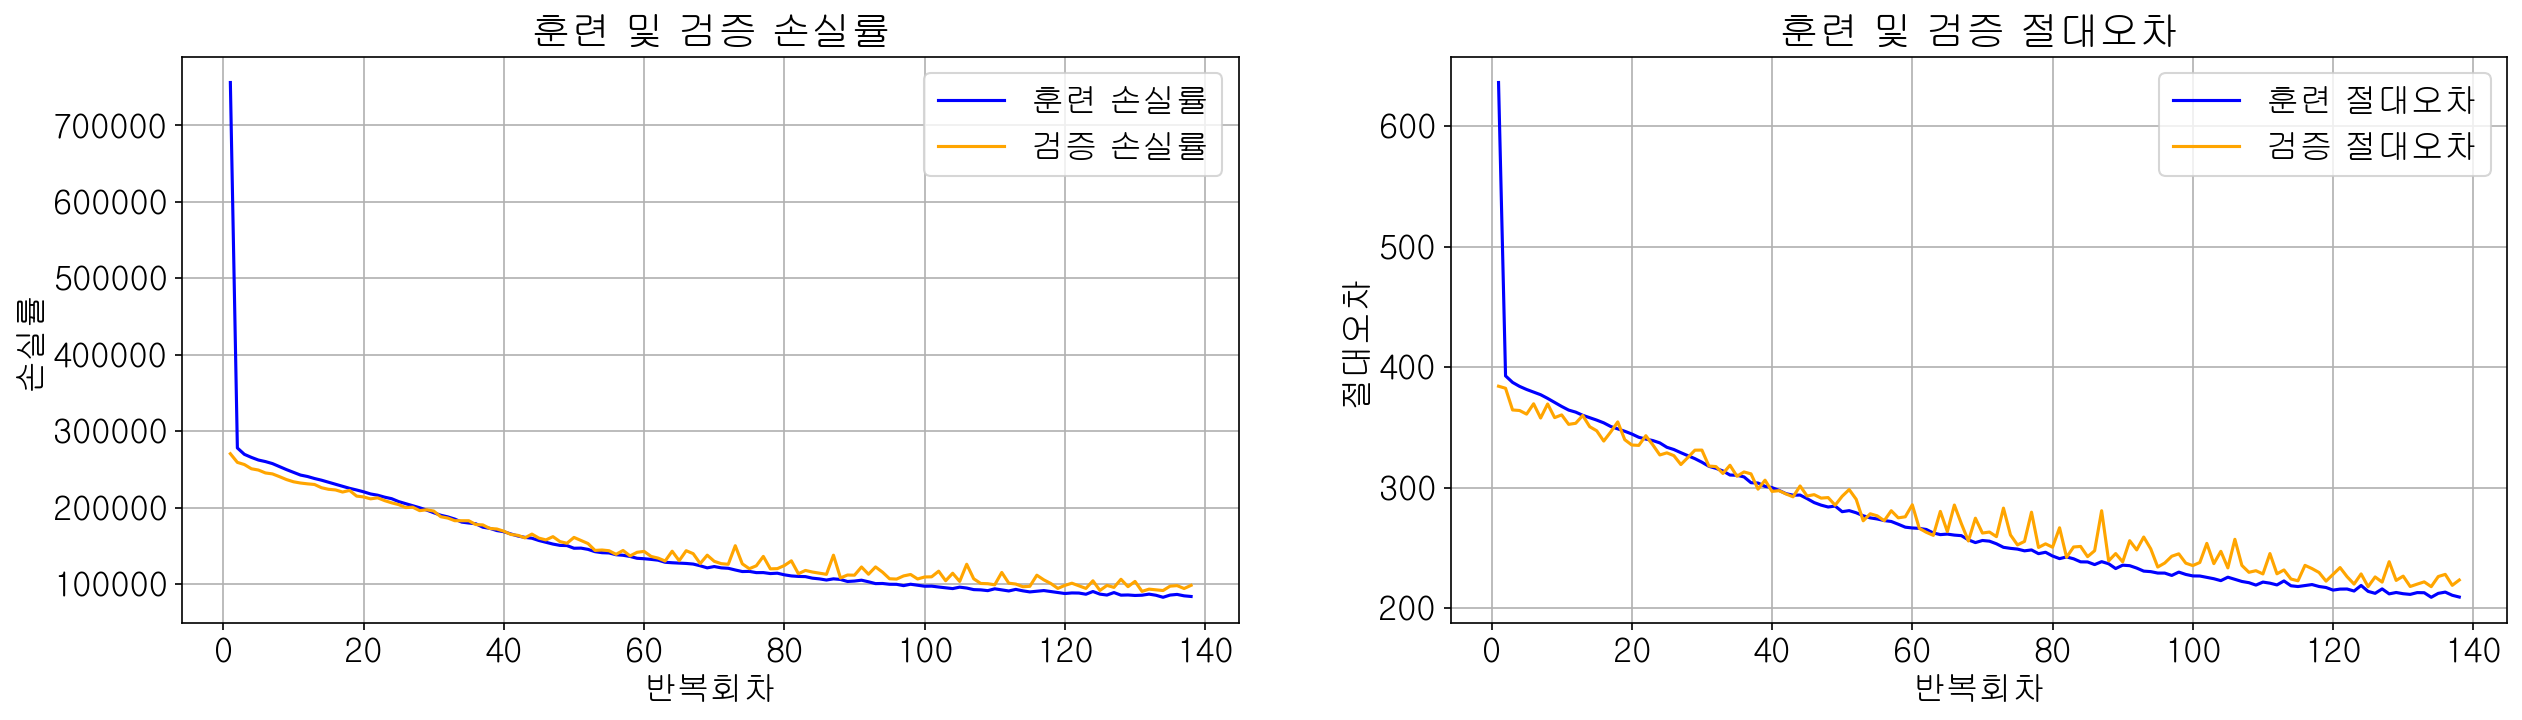

In [312]:
# 그래프 기본 설정
# ----------------------------------------
plt.rcParams["font.family"] = 'Gulim'
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False

# 그래프를 그리기 위한 객체 생성
# ----------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5), dpi=150)

# 1) 훈련 및 검증 손실 그리기
# ----------------------------------------
sns.lineplot(x=result_df.index, y='loss', data=result_df, color='blue', label='훈련 손실률', ax=ax1)
sns.lineplot(x=result_df.index, y='val_loss', data=result_df, color='orange', label='검증 손실률', ax=ax1)
ax1.set_title('훈련 및 검증 손실률')
ax1.set_xlabel('반복회차')
ax1.set_ylabel('손실률')
ax1.grid()
ax1.legend()

# 2) 훈련 및 검증 절대오차 그리기
# ----------------------------------------
sns.lineplot(x=result_df.index, y='mae', data=result_df, color = 'blue', label = '훈련 절대오차', ax=ax2)
sns.lineplot(x=result_df.index, y='val_mae', data=result_df, color = 'orange', label = '검증 절대오차', ax=ax2)
ax2.set_title('훈련 및 검증 절대오차')
ax2.set_xlabel('반복회차')
ax2.set_ylabel('절대오차')
ax2.grid()
ax2.legend()

#plt.savefig('result.png', dpi=200, bbox_inches='tight')
plt.show()
plt.close()

### 모델 성능 평가하기

In [313]:
evaluate = model.evaluate(x_test, y_test)
print("최종 손실률: %f, 최종 절대오차: %f" % (evaluate[0], evaluate[1]))

122/122 [==============================] - 0s 564us/step - loss: 98772.1797 - mae: 223.4203
최종 손실률: 98772.179688, 최종 절대오차: 223.420258


### 테스트 데이터에 대한 예측 결과 산정

In [314]:
test_predictions = model.predict(x_test)
test_predictions

array([[ 796.0446 ],
       [1026.309  ],
       [ 935.96796],
       ...,
       [1188.9923 ],
       [ 734.74036],
       [1112.1893 ]], dtype=float32)

In [315]:
### 결과 데이터 셋 구성

In [316]:
result_df = x_test.copy()
result_df['실제값'] = y_test['전용면적평단가'].values
result_df['예측값'] = test_predictions.flatten()
result_df['예측오차'] = result_df['실제값']-result_df['예측값']
result_df.head()

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
13487 -0.290569 -0.629051 -1.356343 -0.846272  2.329671 -1.534545 -0.481673   
7868   0.700932 -0.673955 -1.249354  1.317792  1.827671  1.846651  1.511506   
13948  0.340924 -0.281384 -1.730340  0.488548 -0.746684  0.850137  0.408224   
14485  1.578763 -1.636663 -1.379291 -1.955101 -0.000607  0.681758  0.282022   
8036  -1.005388  0.179545 -1.069740  0.952703  1.730657 -1.948129 -0.679651   

           pca8     실제값          예측값        예측오차  
13487  0.401429   904.7   796.044617  108.655383  
7868  -0.386669   779.3  1026.308960 -247.008960  
13948 -0.100072   941.5   935.967957    5.532043  
14485  0.314371  1260.9  1451.166504 -190.266504  
8036   0.889505  1085.1  1318.294434 -233.194434

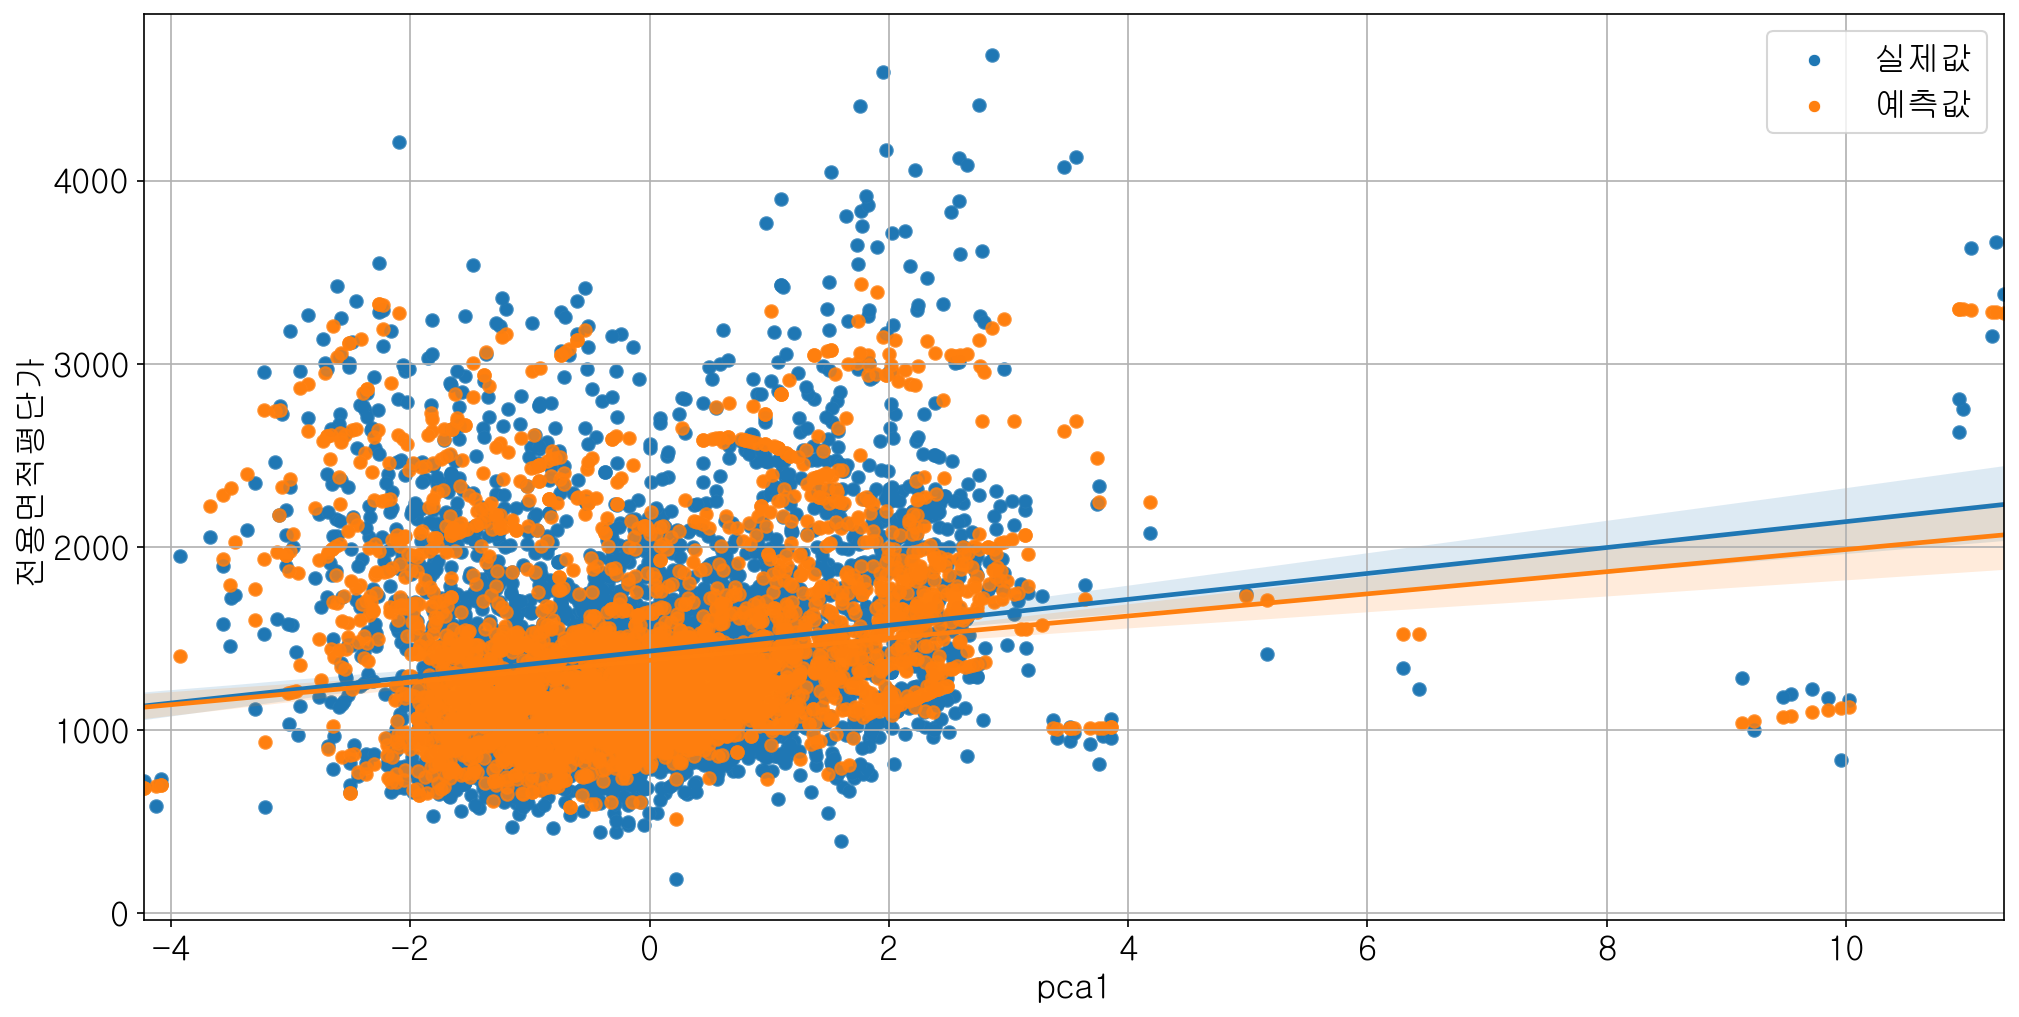

In [318]:
plt.rcParams["font.family"] = 'Gulim'
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False

fig, ax1 = plt.subplots(1, 1, figsize=(16, 8), dpi=150)
sns.scatterplot(x='pca1', y='실제값', data=result_df, label='실제값', ax=ax1)
sns.scatterplot(x='pca1', y='예측값', data=result_df, label='예측값', ax=ax1)
sns.regplot(x='pca1', y='실제값', data=result_df, ax=ax1)
sns.regplot(x='pca1', y='예측값', data=result_df, ax=ax1)
ax1.set_xlabel('pca1')
ax1.set_ylabel('전용면적평단가')
ax1.legend()
ax1.grid()

#plt.savefig('1.png', dpi=200, bbox_inches='tight')
plt.show()
plt.close()